<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Computer%20Vision%20and%20Convolutional%20Neural%20Network%20in%20Tensorflow/CNN_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 1**

## Import The Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import zipfile
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
from pathlib import Path

## Get The Data

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-08-29 00:22:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.207, 142.251.179.207, 64.233.180.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  76.2MB/s    in 1.4s    

2024-08-29 00:22:16 (76.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
for dirpath, dirname, filenames in os.walk("pizza_steak"):
  print(f"There {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There 2 directories and 0 images in pizza_steak
There 2 directories and 0 images in pizza_steak/train
There 0 directories and 750 images in pizza_steak/train/steak
There 0 directories and 750 images in pizza_steak/train/pizza
There 2 directories and 0 images in pizza_steak/test
There 0 directories and 250 images in pizza_steak/test/steak
There 0 directories and 250 images in pizza_steak/test/pizza


## Get The Class Names

In [5]:
current_directory = Path().absolute()
data_directory = current_directory/"pizza_steak/train"

In [6]:
class_names = np.array(sorted([item.name for item in data_directory.glob("*")]))
print(class_names)

['pizza' 'steak']


## Visualize The Random Image

In [7]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # mpimg.imread() doesn't read PosixPath
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image Shape {img.shape}")
  return img

['904938.jpg']
Image Shape (511, 512, 3)


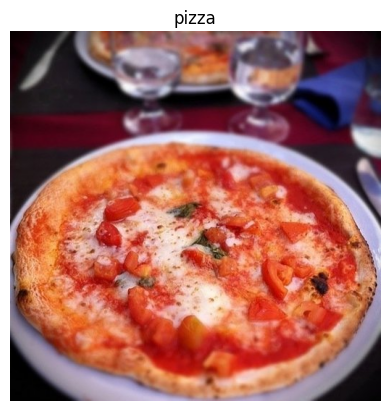

In [8]:
# View Random Image
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

## Get The Train and Test Data

In [9]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

## Augmented Data

In [10]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator instance without data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
# Import data from directory and augment it
print("Augmented Training Data : ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print("Non-Augmented Training Data : ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("Augmented Test Data : ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=True)

Augmented Training Data : 
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data : 
Found 1500 images belonging to 2 classes.
Augmented Test Data : 
Found 500 images belonging to 2 classes.


## Visualize The Augemted Data

In [12]:
images, labels = next(train_data)
augmented_images, augmented_label = next(train_data_augmented)

Show Image No. 29


(-0.5, 223.5, 223.5, -0.5)

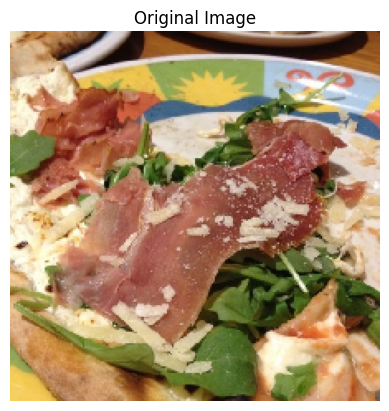

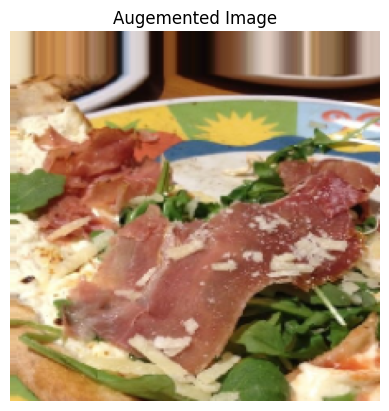

In [13]:
random_number = random.randint(0,31)
print(f"Show Image No. {random_number}")

plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title("Augemented Image")
plt.axis(False)

## Create The CNN Model

In [14]:
# 1. Create The Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile The Model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Create Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/10))

steps_per_epoch = train_data_augmented.samples
validation_steps = train_data.samples

# 4. Fit The Model
find_lr_history = model.fit(train_data_augmented,
                            epochs=6,
                            steps_per_epoch=steps_per_epoch,
                            validation_data=test_data,
                            validation_steps= validation_steps,
                            callbacks=[lr_scheduler])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  47/1500 ━━━━━━━━━━━━━━━━━━━━ 38:50 2s/step - accuracy: 0.5420 - loss: 1.2063

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 103s 64ms/step - accuracy: 0.4729 - loss: 0.9572 - val_accuracy: 0.5820 - val_loss: 0.6906 - learning_rate: 0.0010
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.5804 - loss: 0.6905 - val_accuracy: 0.7260 - val_loss: 0.6588 - learning_rate: 0.0013
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.6129 - loss: 0.6720 - val_accuracy: 0.7380 - val_loss: 0.5703 - learning_rate: 0.0016
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.6251 - loss: 0.7983 - val_accuracy: 0.5920 - val_loss: 0.6800 - learning_rate: 0.0020
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.5226 - loss: 0.6934 - val_accuracy: 0.5620 - val_loss: 0.6890 - learning_rate: 0.0025
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.5374 - loss: 0.6926 - val_accuracy: 0.6380 - val_loss: 0.6866 - learning_rate: 0.0032


## Evaluate The Data

<Axes: >

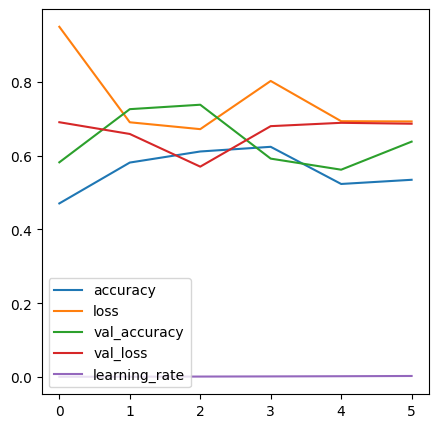

In [16]:
pd.DataFrame(find_lr_history.history).plot(figsize=(5,5))

## Plot Learning Rate  Decay Curve

Text(0.5, 1.0, 'Find The Ideal Learning Rate')

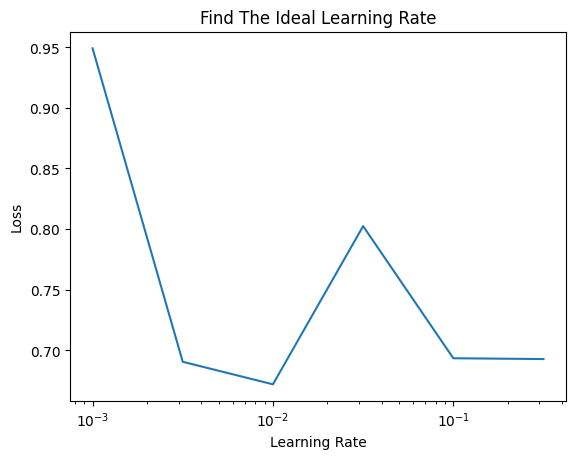

In [28]:
lrs = 1e-3 * (10**(tf.range(6)/2))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Find The Ideal Learning Rate")

## Refit The Model With The Ideal Learning Rate

In [30]:
# 1. Create the model
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation=tf.keras.activations.relu,
                          input_shape=(224,224,3)),
   tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
   tf.keras.layers.Conv2D(10,3, activation="relu"),
   tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

steps_per_epoch = train_data_augmented.samples
validation_steps = test_data.samples


# 3. Fit the model
history = model.fit(train_data_augmented,
                    epochs=6,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_data,
                    validation_steps=validation_steps)

Epoch 1/6
  47/1500 ━━━━━━━━━━━━━━━━━━━━ 31:19 1s/step - accuracy: 0.5938 - loss: 1.4748

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.5268 - loss: 1.0941 - val_accuracy: 0.7000 - val_loss: 0.5998
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.6110 - loss: 0.6593 - val_accuracy: 0.6040 - val_loss: 0.6260
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 44ms/step - accuracy: 0.6237 - loss: 0.6517 - val_accuracy: 0.6780 - val_loss: 0.5723
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.6538 - loss: 0.6194 - val_accuracy: 0.6360 - val_loss: 0.5771
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.7184 - loss: 0.5838 - val_accuracy: 0.5680 - val_loss: 0.8568
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.6682 - loss: 0.6369 - val_accuracy: 0.6460 - val_loss: 0.6293


## Create Function For Loss Curve

In [34]:
def plot_loss_curve(history):
  """
   plot loss curve for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(5,5))
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.xlabel("epochs")
  plt.title("loss")
  plt.legend()

  plt.figure(figsize=(5,5))
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val accuracy")
  plt.xlabel("epochs")
  plt.title("accuracy")
  plt.legend()

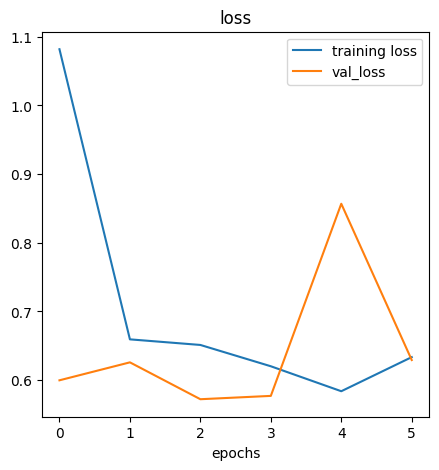

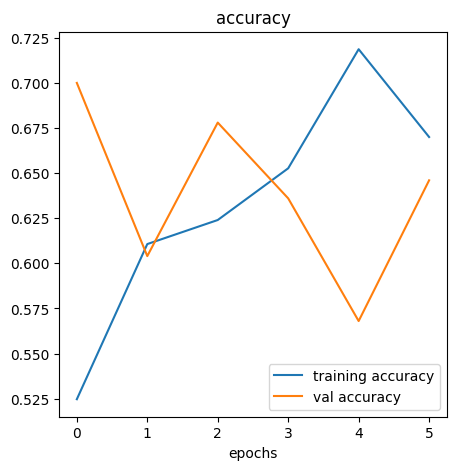

In [35]:
plot_loss_curve(history)

## Function To Resize Custom Image